In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import math
import pickle
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("churn.csv")
df_data = pd.DataFrame(data)
df_data.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
display(df_data.describe())

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
df_data = df_data.drop('Surname', axis=1)
df_data.head(5)

RowNumber  CustomerId  CreditScore Geography  Gender  Age  Tenure  \
0          1    15634602          619    France  Female   42       2   
1          2    15647311          608     Spain  Female   41       1   
2          3    15619304          502    France  Female   42       8   
3          4    15701354          699    France  Female   39       1   
4          5    15737888          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

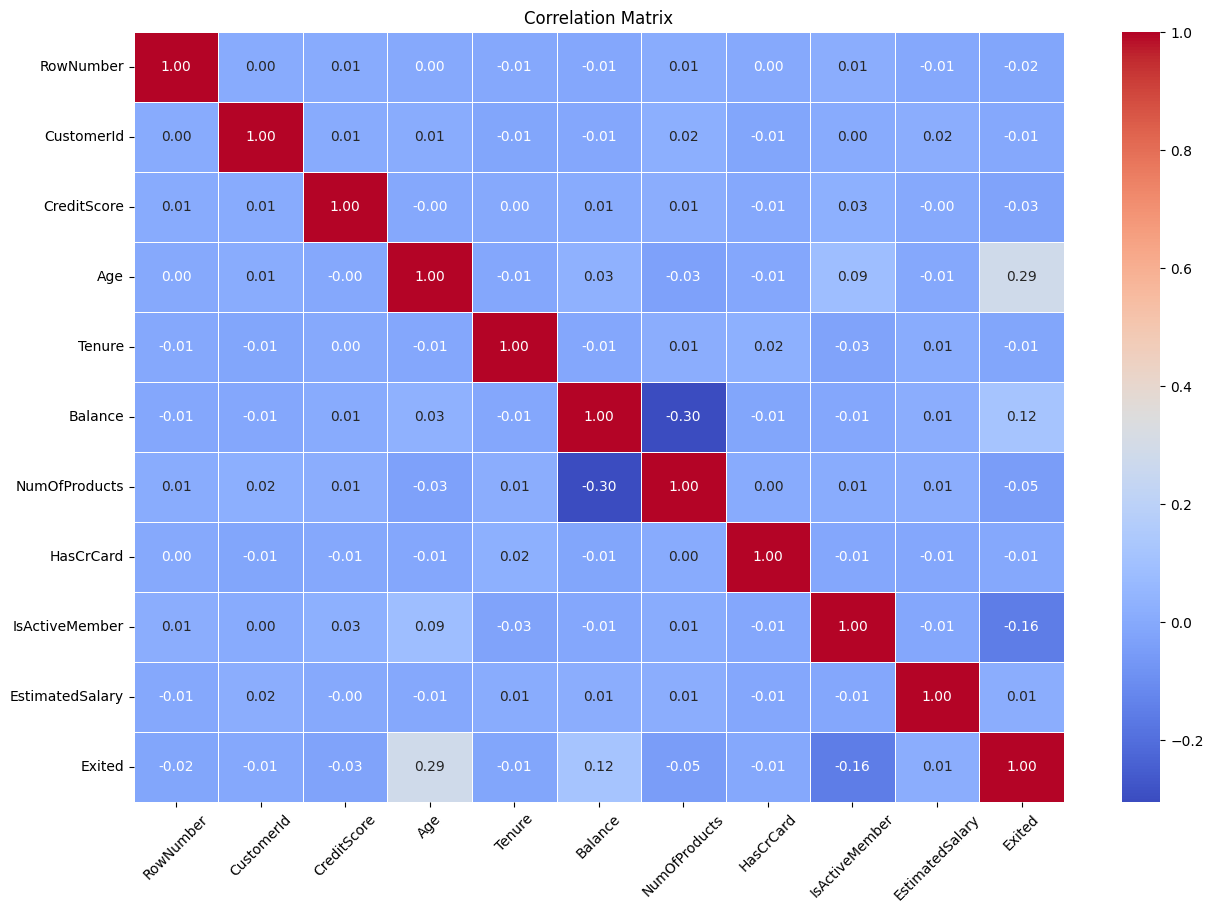

In [7]:
#Correlation_matrix
# Filter only numeric columns
numeric_columns = df_data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

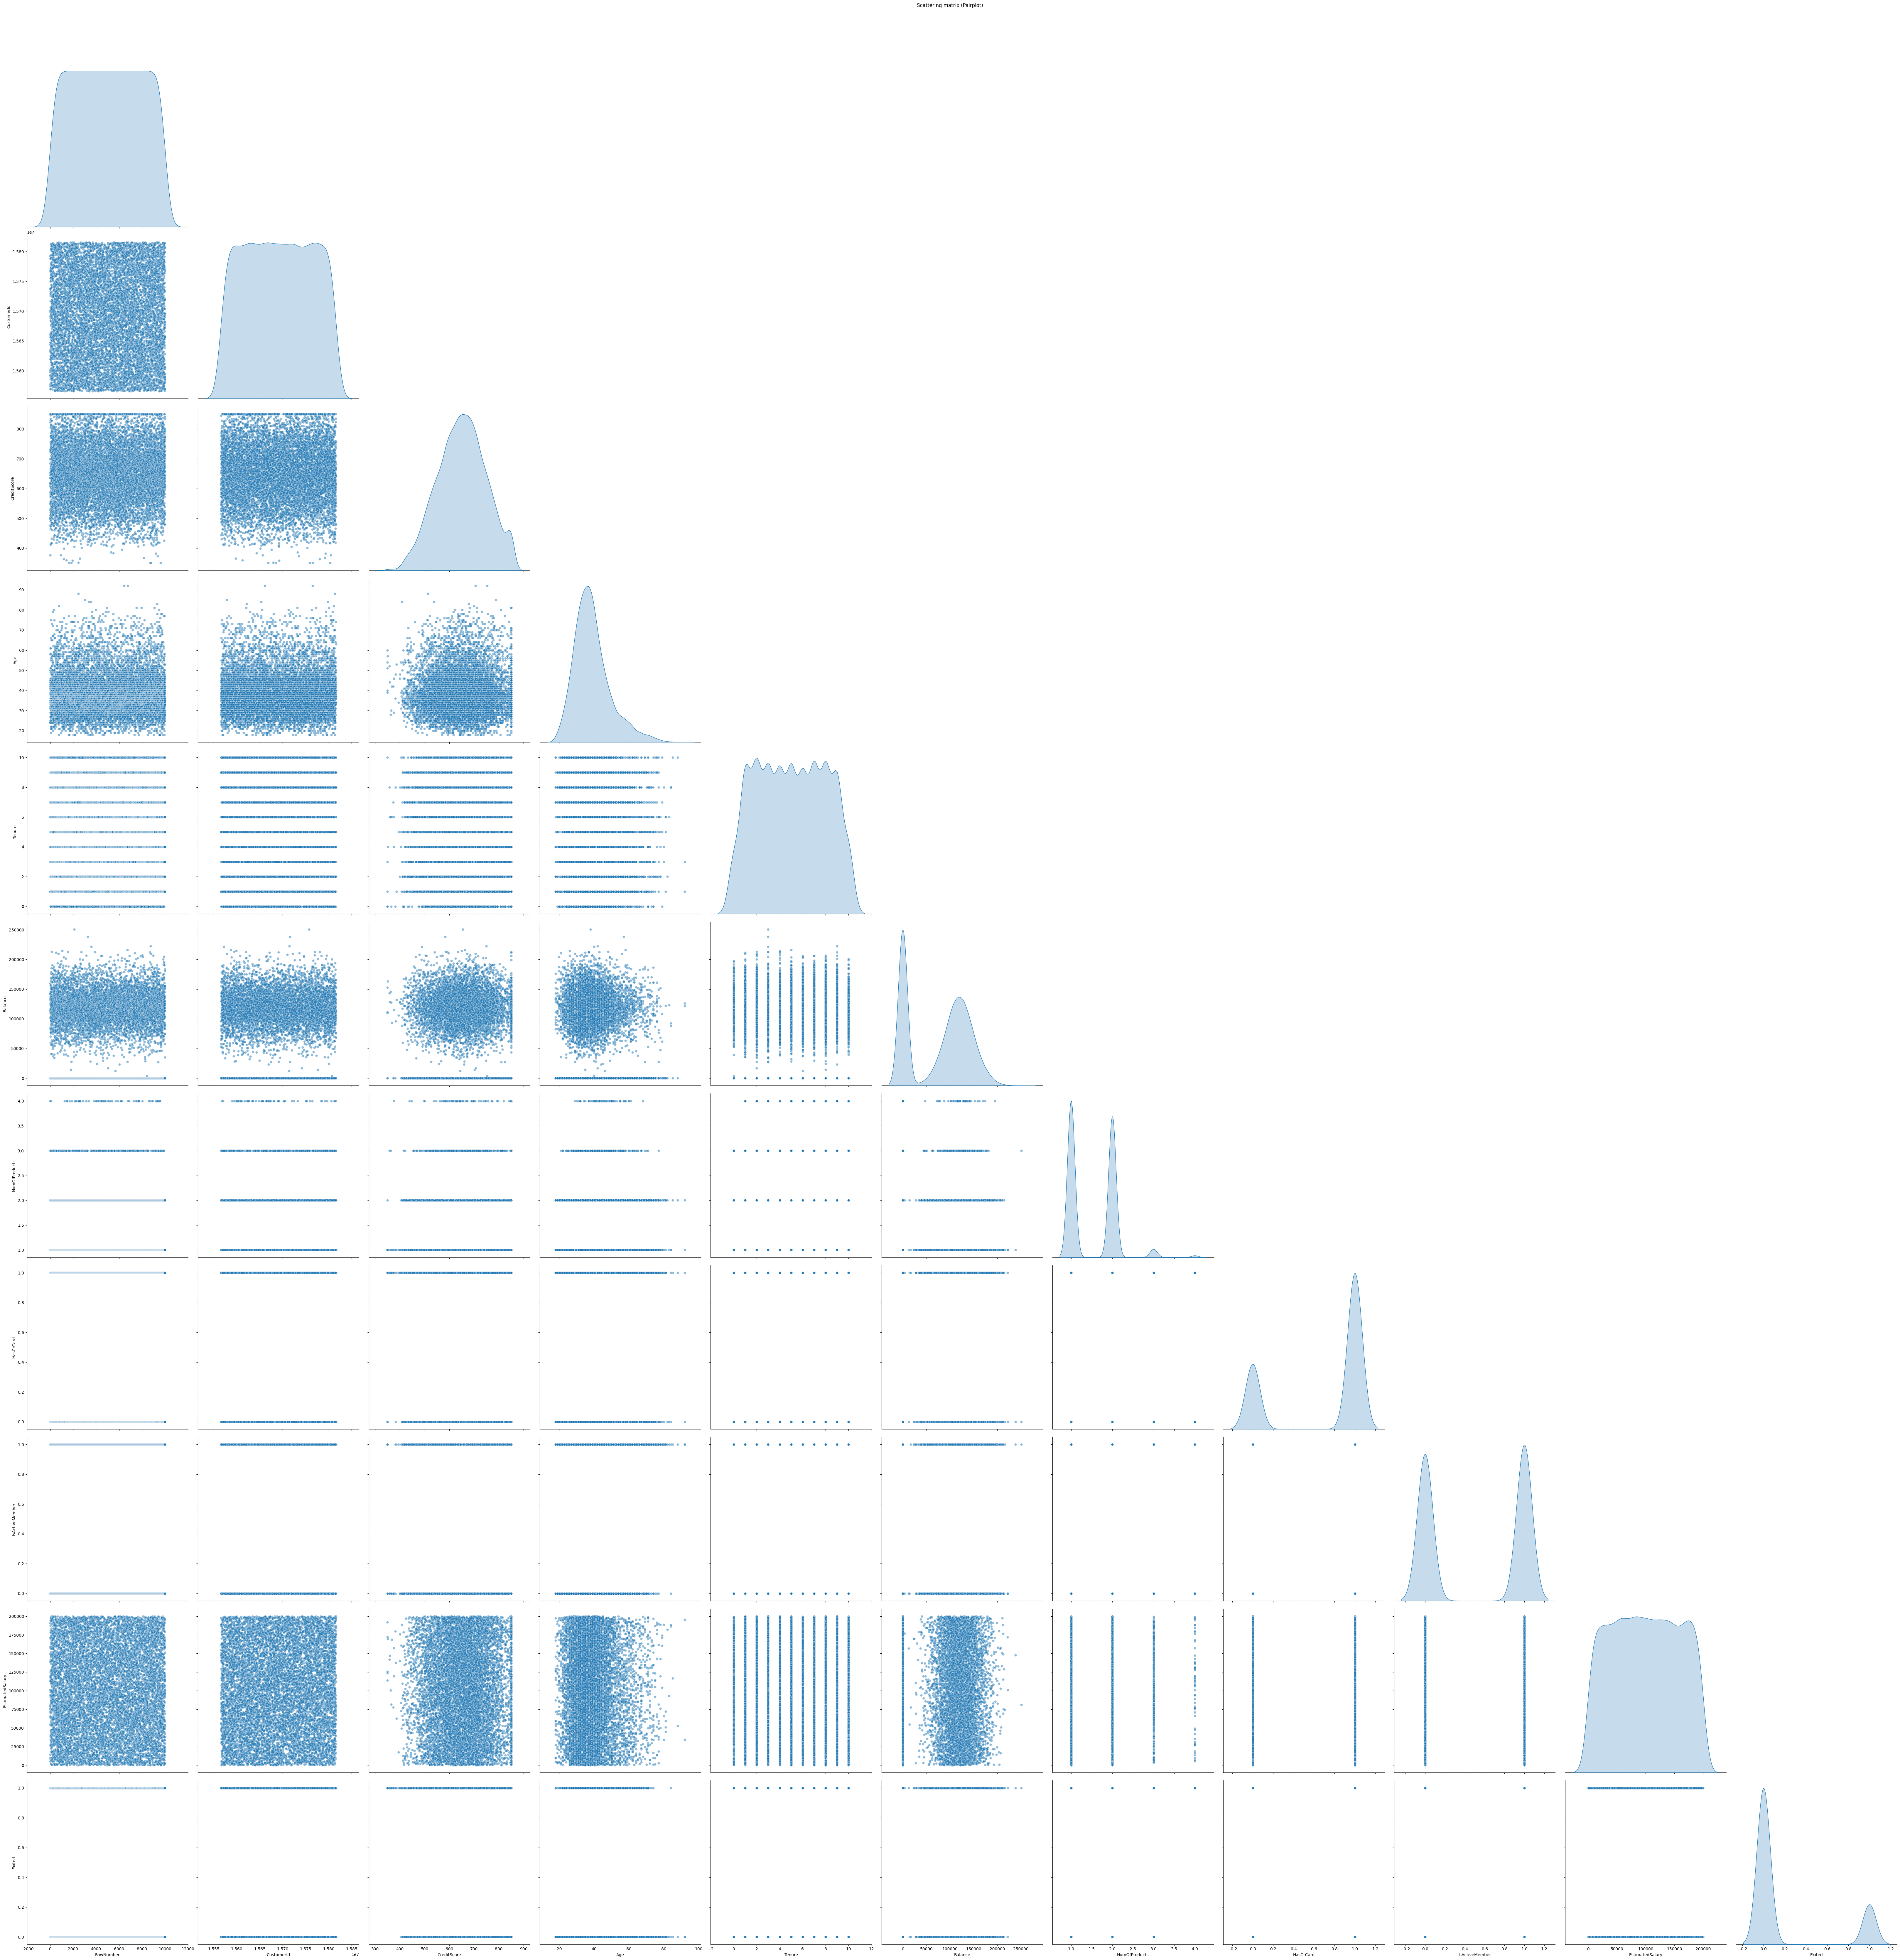

In [8]:
# Data distributions
sns.pairplot(numeric_columns, diag_kind='kde', corner=True, plot_kws={'alpha': 0.5}, height=6)
plt.suptitle("Scattering matrix (Pairplot)", y=1.02)
plt.show()

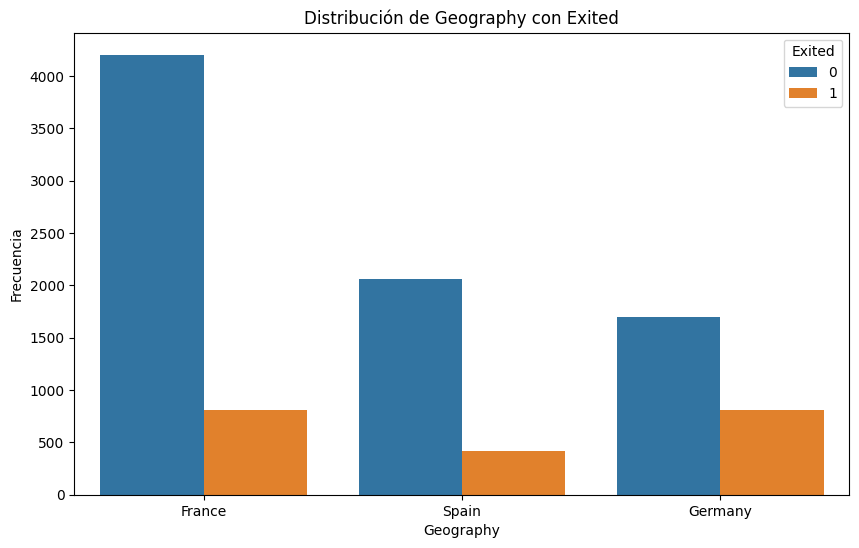

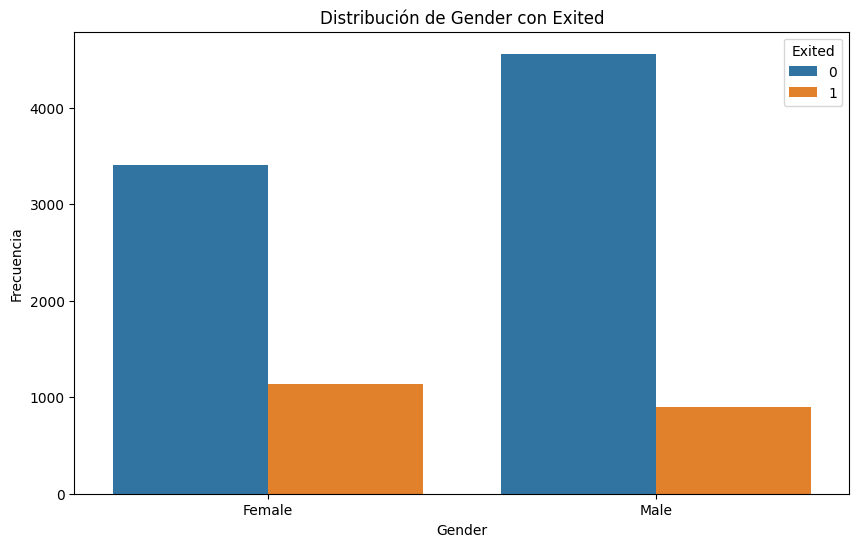

In [9]:
categorical_columns = df_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_data, x=column, hue="Exited")
    plt.title(f"Distribución de {column} con Exited")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.legend(title="Exited", loc='upper right')
    plt.show()

In [10]:
# Eliminamos columnas irrelevantes sin usar inplace
df_data = df_data.drop(['RowNumber', 'CustomerId'], axis=1)

# Codificación de la columna Gender usando LabelEncoder
le = LabelEncoder()
df_data['Gender'] = le.fit_transform(df_data['Gender'])

# Generamos columnas dummy para Geography
df_data = pd.get_dummies(df_data, columns=['Geography'], drop_first=True)

# Verificamos los cambios
df_data.head()


CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  Geography_Spain  
0               1        101348.88       1              False            False  
1               1        112542.58       0              False             True  
2               0        113931.57       1              False            False  
3               0         93826.63       0              False            False  
4               1         79084.10       0              False             True

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_data.select_dtypes(include=['number']))
df_data[df_data.select_dtypes(include=['number']).columns] = scaled_features
df_data.head(5)

CreditScore    Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.326221 -1.095988  0.293517 -1.041760 -1.225848      -0.911583   
1    -0.440036 -1.095988  0.198164 -1.387538  0.117350      -0.911583   
2    -1.536794 -1.095988  0.293517  1.032908  1.333053       2.527057   
3     0.501521 -1.095988  0.007457 -1.387538 -1.225848       0.807737   
4     2.063884 -1.095988  0.388871 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary    Exited  Geography_Germany  \
0   0.646092        0.970243         0.021886  1.977165              False   
1  -1.547768        0.970243         0.216534 -0.505775              False   
2   0.646092       -1.030670         0.240687  1.977165              False   
3  -1.547768       -1.030670        -0.108918 -0.505775              False   
4   0.646092        0.970243        -0.365276 -0.505775              False   

   Geography_Spain  
0            False  
1             True  
2            False  
3            False  
4             True

In [12]:
# Calcular el Z-Score para columnas numéricas
z_scores = df_data.select_dtypes(include=['number']).apply(zscore)

# Identificar valores fuera del umbral
outliers = (z_scores.abs() > 3)

# Mostrar columnas y filas con outliers
print("Outliers detectados:")
print(outliers.sum(axis=0))  # Conteo de outliers por columna


Outliers detectados:
CreditScore          8
Gender               0
Age                133
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


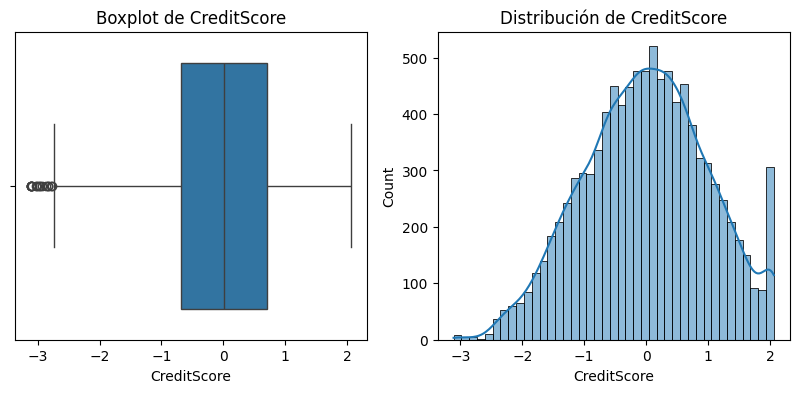

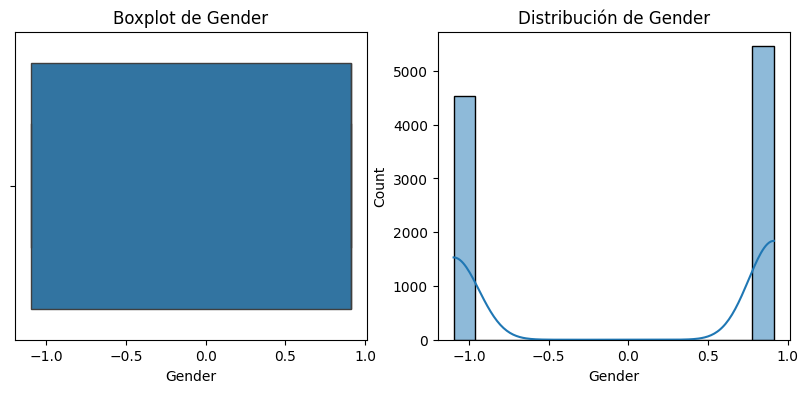

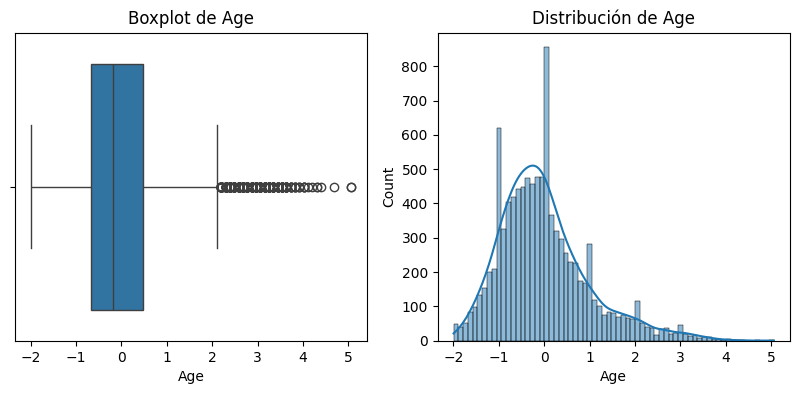

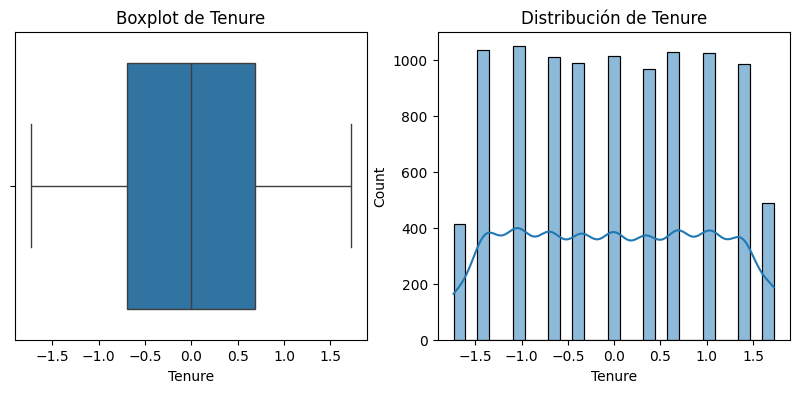

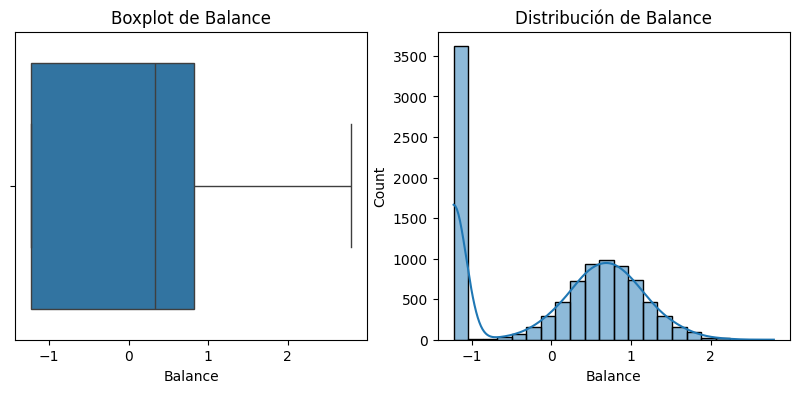

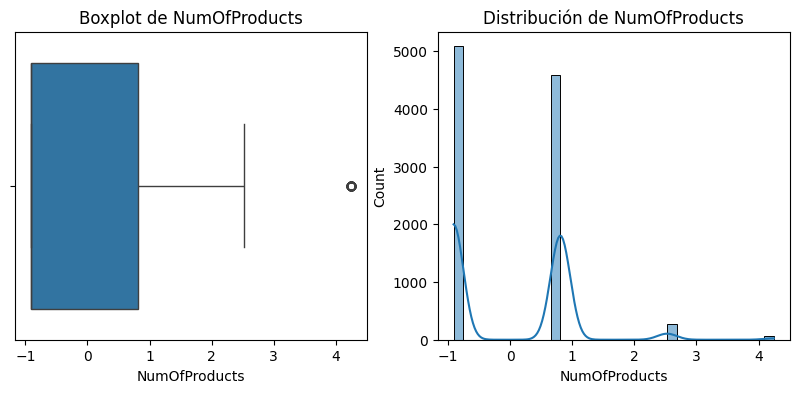

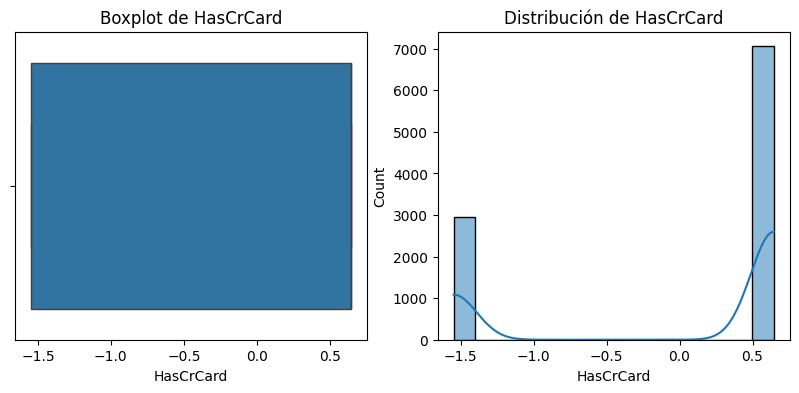

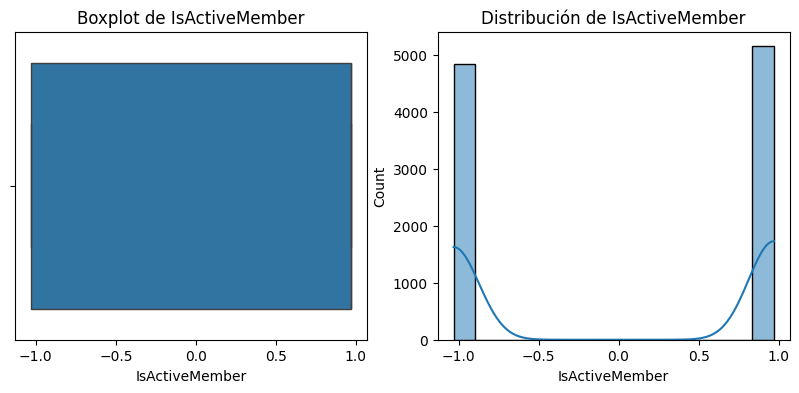

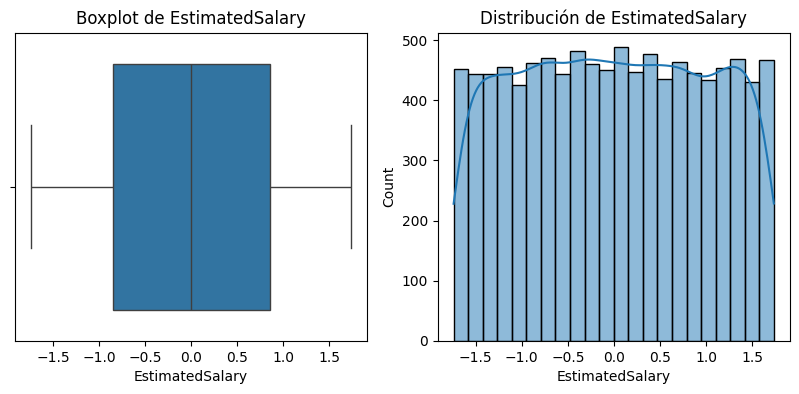

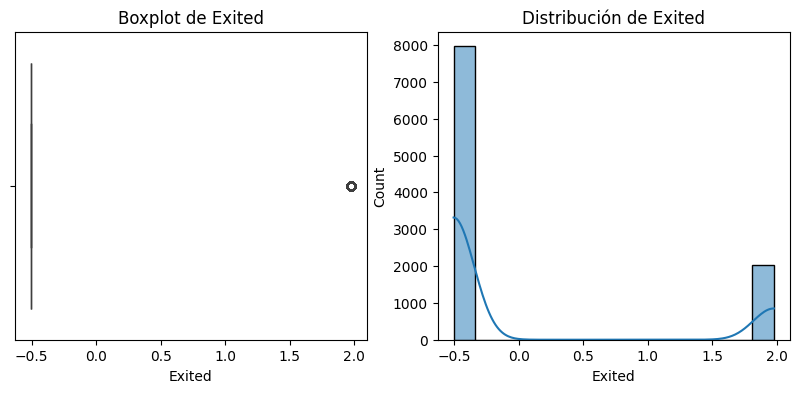

In [13]:
for column in df_data.select_dtypes(include=['number']).columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    sns.boxplot(x=df_data[column], ax=ax[0])
    ax[0].set_title(f"Boxplot de {column}")
    
    sns.histplot(df_data[column], kde=True, ax=ax[1])
    ax[1].set_title(f"Distribución de {column}")
    
    plt.show()


In [14]:
# Variables independientes y dependientes
X = df_data.drop('Exited', axis=1)
y = df_data['Exited']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
print(y.unique())

[ 1.97716468 -0.50577476]


In [16]:
y = y.astype(int)  # Convertir a entero si es necesario

In [17]:
print(y.unique())

[1 0]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [21]:
# Para entrenamiento
train_predictions = pd.DataFrame({
    'Real': y_train,
    'Predicción': y_train_pred
})
print("Predicciones del conjunto de entrenamiento:")
display(train_predictions.head())

# Para prueba
test_predictions = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_test_pred
})
print("Predicciones del conjunto de prueba:")
display(test_predictions.head())

Predicciones del conjunto de entrenamiento:


Real  Predicción
2151     1           1
8392     1           1
5006     0           0
4117     0           0
7182     0           0

Predicciones del conjunto de prueba:


Real  Predicción
5702     0           0
3667     0           0
1617     0           0
5673     0           0
4272     0           0

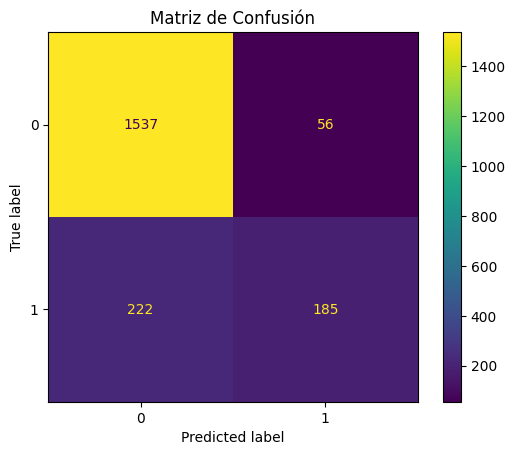

In [22]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Matriz de Confusión")
plt.show()

In [23]:
# Reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_test_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.2f}")


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

ROC-AUC: 0.85


In [24]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"ROC-AUC promedio en validación cruzada: {cv_scores.mean():.2f}")

ROC-AUC promedio en validación cruzada: 0.85


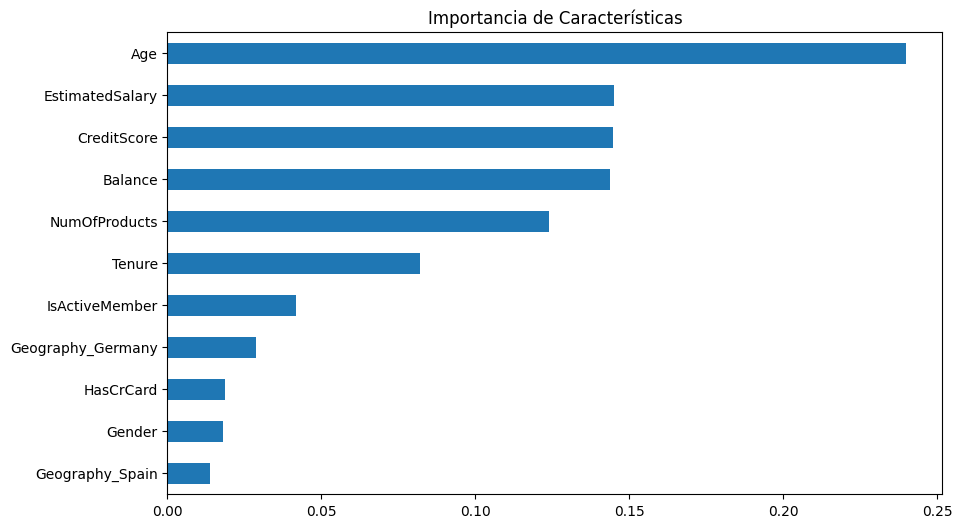

In [25]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Importancia de Características")
plt.show()

In [26]:
# Definición de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda en grilla
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor ROC-AUC: {grid_search.best_score_:.2f}")


Mejores parámetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Mejor ROC-AUC: 0.86


In [27]:
# Guardar modelo
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']